In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd

In [2]:
model_data = pd.read_csv('data_clean.csv')

In [3]:
y = model_data['label']
X = model_data.drop('label',axis=1)

In [ ]:
# Encode categorical data

In [4]:
categorical_variables = ['phone_carrier','phone_disposable_validation','phone_ported_original_carrier',
                         'phone_ported_validation','email_deliverable_validation','email_disposable_validation',
                        'email_domain_free_provider_flag','email_is_breached_flag','website_exists']

In [5]:
all_columns = model_data.columns

In [6]:
all_columns

Index(['phone_carrier', 'phone_disposable_validation',
       'phone_ported_original_carrier', 'phone_ported_validation',
       'phone_social_number_of_names_returned',
       'phone_social_number_of_photos_returned',
       'phone_social_registered_ecommerce_profiles',
       'phone_social_registered_email_provider_profiles',
       'phone_social_registered_messaging_profiles',
       'phone_social_registered_professional_profiles',
       'phone_social_registered_profiles',
       'phone_social_registered_social_media_profiles',
       'email_deliverable_validation', 'email_disposable_validation',
       'email_domain_free_provider_flag', 'email_is_breached_flag',
       'email_number_of_breaches', 'email_social_number_of_names_returned',
       'email_social_number_of_photos_returned',
       'email_social_registered_consumer_electronics_profiles',
       'email_social_registered_ecommerce_profiles',
       'email_social_registered_email_provider_profiles',
       'email_social_reg

In [7]:
model_data['phone_carrier'] = model_data['phone_carrier'].replace(
    {'Telefnica Mviles Colombia (Movistar)': 'otro',
     'Comcel': 'otro',
     'COLOMBIA TELECOMUNICACIONES S.A. ESP' : 'otro',
     'Comunicacion Celular S.A.' : 'otro',
     'COLOMBIA MOVIL S.A. E.S.P.' : 'otro',
     'Colombia Mvil' : 'otro',
     'Colombia Telecomunicaciones S.A. E.S.P.' : 'otro',
     'COMUNICACION CELULAR (Claro)' : 'otro',
     'Avantel S.A.' : 'otro',
     'Colombia Movil S.A. E.S.P.' : 'otro',
     'EMPRESA DE TELECOMUNICACIONES DE BOGOTA S.A. ESP.' : 'otro',
     'LOGISTICA FLASH COLOMBIA S.A.S' : 'otro',
     'Avantel S.A.S' : 'otro',
     'Avantel' : 'otro',
     'Movistar' : 'otro',
     'WOM' : 'otro',
     'Suma Movil SAS' : 'otro',
     'Claro' : 'otro',
     })


In [11]:
model_data['phone_carrier'].value_counts()

,count
phone_carrier,
Comcel S.A. (Claro),5467
Colombia Movil (Tigo),1508
Telefonica Colombia (Movistar),1488
Partners Telecom (WOM),186
Virgin Mobile (Colombia),135
otro,114
ALMACENES EXITO INVERSIONES S.A.S.,99
EMPRESA DE TELECOMUNICACIONES DE BOGOTA,74
COMUNICACION CELULAR S.A.,58


In [12]:
categorical_data = model_data[categorical_variables]

In [14]:
categorical_one_hot = pd.get_dummies(categorical_data, drop_first=False, dtype=int)

In [13]:
numerical_columns = [col for col in all_columns if col not in categorical_variables]

In [15]:
numerical_data = model_data[numerical_columns]

In [16]:
categorical_one_hot.head()

,phone_disposable_validation,phone_ported_validation,email_deliverable_validation,email_disposable_validation,email_domain_free_provider_flag,email_is_breached_flag,website_exists,phone_carrier_ALMACENES EXITO INVERSIONES S.A.S.,phone_carrier_COMUNICACION CELULAR S.A.,phone_carrier_Colombia Movil (Tigo),...,phone_carrier_Telefonica Colombia (Movistar),phone_carrier_Virgin Mobile (Colombia),phone_carrier_otro,phone_ported_original_carrier_Claro Comunicacion Celular S.A. (Comcel),phone_ported_original_carrier_Movistar Colombia Telecomunicaciones S.A. ESP,phone_ported_original_carrier_SUMA MOVIL SAS,phone_ported_original_carrier_Tigo Colombia Móvil S.A. ESP,phone_ported_original_carrier_Virgin Mobile Virgin Mobile Colombia S.A.S.,phone_ported_original_carrier_WOM Partners Telecom Colombia SAS,phone_ported_original_carrier_eTb Empresa de Telecomunicaciones de Bogotá S.A. ESP
0,False,True,True,False,True,True,True,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,False,False,True,False,True,True,True,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,False,False,True,False,True,True,True,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,False,False,True,False,True,True,True,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,False,True,True,False,True,True,True,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
categorical_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 23 columns):
 #   Column                                                                              Non-Null Count  Dtype
---  ------                                                                              --------------  -----
 0   phone_disposable_validation                                                         9129 non-null   bool 
 1   phone_ported_validation                                                             9129 non-null   bool 
 2   email_deliverable_validation                                                        9129 non-null   bool 
 3   email_disposable_validation                                                         9129 non-null   bool 
 4   email_domain_free_provider_flag                                                     9129 non-null   bool 
 5   email_is_breached_flag                                                              9129 non-null   bool 
 6   

In [19]:
numerical_all_data = pd.concat([numerical_data,categorical_one_hot], axis=1)

In [20]:
numerical_all_data.head()

,phone_social_number_of_names_returned,phone_social_number_of_photos_returned,phone_social_registered_ecommerce_profiles,phone_social_registered_email_provider_profiles,phone_social_registered_messaging_profiles,phone_social_registered_professional_profiles,phone_social_registered_profiles,phone_social_registered_social_media_profiles,email_number_of_breaches,email_social_number_of_names_returned,...,phone_carrier_Telefonica Colombia (Movistar),phone_carrier_Virgin Mobile (Colombia),phone_carrier_otro,phone_ported_original_carrier_Claro Comunicacion Celular S.A. (Comcel),phone_ported_original_carrier_Movistar Colombia Telecomunicaciones S.A. ESP,phone_ported_original_carrier_SUMA MOVIL SAS,phone_ported_original_carrier_Tigo Colombia Móvil S.A. ESP,phone_ported_original_carrier_Virgin Mobile Virgin Mobile Colombia S.A.S.,phone_ported_original_carrier_WOM Partners Telecom Colombia SAS,phone_ported_original_carrier_eTb Empresa de Telecomunicaciones de Bogotá S.A. ESP
0,0,0,1,0,1,1,5,2,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,5.0,0.0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,4,2,3.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,4,3,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,1,4,2,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
numerical_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 44 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   phone_social_number_of_names_returned                                               9129 non-null   int64  
 1   phone_social_number_of_photos_returned                                              9129 non-null   int64  
 2   phone_social_registered_ecommerce_profiles                                          9129 non-null   int64  
 3   phone_social_registered_email_provider_profiles                                     9129 non-null   int64  
 4   phone_social_registered_messaging_profiles                                          9129 non-null   int64  
 5   phone_social_registered_professional_profiles                                       9129 non-null

In [ ]:
numerical_columns

['phone_social_number_of_names_returned',
 'phone_social_number_of_photos_returned',
 'phone_social_registered_ecommerce_profiles',
 'phone_social_registered_email_provider_profiles',
 'phone_social_registered_messaging_profiles',
 'phone_social_registered_professional_profiles',
 'phone_social_registered_profiles',
 'phone_social_registered_social_media_profiles',
 'email_number_of_breaches',
 'email_social_number_of_names_returned',
 'email_social_number_of_photos_returned',
 'email_social_registered_consumer_electronics_profiles',
 'email_social_registered_ecommerce_profiles',
 'email_social_registered_email_provider_profiles',
 'email_social_registered_entertainment_profiles',
 'email_social_registered_messaging_profiles',
 'email_social_registered_professional_profiles',
 'email_social_registered_profiles',
 'email_social_registered_social_media_profiles',
 'email_social_registered_travel_profiles',
 'label']

In [ ]:
model_data['phone_carrier'].value_counts()

,count
phone_carrier,
Comcel S.A. (Claro),5467
Colombia Movil (Tigo),1508
Telefonica Colombia (Movistar),1488
Partners Telecom (WOM),186
Virgin Mobile (Colombia),135
otro,114
ALMACENES EXITO INVERSIONES S.A.S.,99
EMPRESA DE TELECOMUNICACIONES DE BOGOTA,74
COMUNICACION CELULAR S.A.,58


In [ ]:
model_data['phone_ported_original_carrier'].value_counts()

,count
phone_ported_original_carrier,
Claro Comunicacion Celular S.A. (Comcel),5565
Tigo Colombia Móvil S.A. ESP,1629
Movistar Colombia Telecomunicaciones S.A. ESP,1432
Virgin Mobile Virgin Mobile Colombia S.A.S.,229
WOM Partners Telecom Colombia SAS,195
eTb Empresa de Telecomunicaciones de Bogotá S.A. ESP,78
SUMA MOVIL SAS,1


In [ ]:
model_data['email_domain_free_provider_flag'].value_counts()

,count
email_domain_free_provider_flag,
True,8982
False,147


In [ ]:
model_data['website_exists'].value_counts()

,count
website_exists,
True,9075
False,54


Clean the model_data['phone_carrier'].value_counts()

In [ ]:
model_data['phone_carrier'].value_counts()

,count
phone_carrier,
Comcel S.A. (Claro),5467
Colombia Movil (Tigo),1508
Telefonica Colombia (Movistar),1488
Partners Telecom (WOM),186
Virgin Mobile (Colombia),135
otro,114
ALMACENES EXITO INVERSIONES S.A.S.,99
EMPRESA DE TELECOMUNICACIONES DE BOGOTA,74
COMUNICACION CELULAR S.A.,58


In [ ]:
#encoder = OneHotEncoder()

In [ ]:
#encoded_sparse = encoder.fit_transform(data)


In [ ]:
#df_encoded = pd.get_dummies(df, dtype = int)

In [22]:
y = numerical_all_data['label']
X = numerical_all_data.drop('label',axis=1)

In [23]:
numerical_all_data

,phone_social_number_of_names_returned,phone_social_number_of_photos_returned,phone_social_registered_ecommerce_profiles,phone_social_registered_email_provider_profiles,phone_social_registered_messaging_profiles,phone_social_registered_professional_profiles,phone_social_registered_profiles,phone_social_registered_social_media_profiles,email_number_of_breaches,email_social_number_of_names_returned,...,phone_carrier_Telefonica Colombia (Movistar),phone_carrier_Virgin Mobile (Colombia),phone_carrier_otro,phone_ported_original_carrier_Claro Comunicacion Celular S.A. (Comcel),phone_ported_original_carrier_Movistar Colombia Telecomunicaciones S.A. ESP,phone_ported_original_carrier_SUMA MOVIL SAS,phone_ported_original_carrier_Tigo Colombia Móvil S.A. ESP,phone_ported_original_carrier_Virgin Mobile Virgin Mobile Colombia S.A.S.,phone_ported_original_carrier_WOM Partners Telecom Colombia SAS,phone_ported_original_carrier_eTb Empresa de Telecomunicaciones de Bogotá S.A. ESP
0,0,0,1,0,1,1,5,2,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,1,0,1,0,5.0,0.0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,4,2,3.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,1,0,4,3,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,1,4,2,2.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,0,1,0,1,1,0,4,2,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
9125,0,0,0,0,1,1,4,2,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
9126,0,0,0,0,0,0,2,2,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
9127,0,0,0,0,0,0,2,2,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
### balancear. class_weight=class_weight

In [ ]:
### SMOTE

In [27]:
# neg, pos = np.bincount(y_train)

In [28]:
# total = neg + pos

In [ ]:
total

np.int64(7303)

In [29]:
# weight_for_0 = (1 / neg) * (total / 2.0)
# weight_for_1 = (1 / pos) * (total / 2.0)
# class_weight = {0: weight_for_0, 1: weight_for_1}

In [ ]:
class_weight

{0: np.float64(0.5381724392041268), 1: np.float64(7.0492277992278)}

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from imblearn.over_sampling import SMOTE


In [32]:
sm = SMOTE(random_state=42)


In [33]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [34]:
X_train_res.shape

(13570, 43)

In [35]:
X_train.shape ### 7303

(7303, 43)

In [36]:
X.columns

Index(['phone_social_number_of_names_returned',
       'phone_social_number_of_photos_returned',
       'phone_social_registered_ecommerce_profiles',
       'phone_social_registered_email_provider_profiles',
       'phone_social_registered_messaging_profiles',
       'phone_social_registered_professional_profiles',
       'phone_social_registered_profiles',
       'phone_social_registered_social_media_profiles',
       'email_number_of_breaches', 'email_social_number_of_names_returned',
       'email_social_number_of_photos_returned',
       'email_social_registered_consumer_electronics_profiles',
       'email_social_registered_ecommerce_profiles',
       'email_social_registered_email_provider_profiles',
       'email_social_registered_entertainment_profiles',
       'email_social_registered_messaging_profiles',
       'email_social_registered_professional_profiles',
       'email_social_registered_profiles',
       'email_social_registered_social_media_profiles',
       'email_socia

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
X_train

array([[ 0.        , -0.77129094, -0.42426026, ..., -0.16166202,
        -0.14918592, -0.08790526],
       [ 0.        , -0.77129094, -0.42426026, ..., -0.16166202,
        -0.14918592, -0.08790526],
       [ 0.        ,  1.29652761, -0.42426026, ..., -0.16166202,
        -0.14918592, -0.08790526],
       ...,
       [ 0.        , -0.77129094, -0.42426026, ..., -0.16166202,
        -0.14918592, -0.08790526],
       [ 0.        , -0.77129094, -0.42426026, ..., -0.16166202,
        -0.14918592, -0.08790526],
       [ 0.        ,  1.29652761, -0.42426026, ..., -0.16166202,
        -0.14918592, -0.08790526]])

In [40]:
X_train.shape[1]

43

In [41]:
X_train_res.shape[1]

43

In [42]:
y_train.value_counts()

,count
label,
0,6785
1,518


In [43]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=a62fd53f59bb72475c66e9ab885a97b16d6483692e6b2e854cff54de008fd5e4
  Stored in directory: /root/.cache/pip/wheels/19/0d/33/eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


In [44]:
from tensorflow.keras.utils import to_categorical

In [45]:
y_train_c= to_categorical(y_train_res,num_classes=2)


In [46]:
y_test_c= to_categorical(y_test,num_classes=2)

In [47]:
print("Shape of y_train",y_train_c.shape)
print("Shape of y_test",y_test_c.shape)

Shape of y_train (13570, 2)
Shape of y_test (1826, 2)


In [48]:
# 2. Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(43, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with 10 neurons
    keras.layers.Dense(10, activation='relu'),                                   # Hidden layer with 10 neurons
    keras.layers.Dense(1, activation='sigmoid')                                  # Output layer with 3 neurons (for 3 Iris classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# 2. switch to softmax
model = keras.Sequential([
    keras.layers.Dense(43, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with 10 neurons
    keras.layers.Dense(10, activation='relu'),                                   # Hidden layer with 10 neurons
    keras.layers.Dense(2, activation='softmax')                                  # Output layer with 3 neurons (for 3 Iris classes)
])

In [50]:
# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# 3. Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(X_train_res, y_train_c, epochs=50, batch_size=20, validation_split=0.1)

Epoch 1/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6092 - loss: 0.6465 - val_accuracy: 0.6544 - val_loss: 0.6100
Epoch 2/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7215 - loss: 0.5368 - val_accuracy: 0.7612 - val_loss: 0.4588
Epoch 3/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7482 - loss: 0.4866 - val_accuracy: 0.6912 - val_loss: 0.5066
Epoch 4/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7718 - loss: 0.4513 - val_accuracy: 0.7546 - val_loss: 0.4489
Epoch 5/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7915 - loss: 0.4270 - val_accuracy: 0.7060 - val_loss: 0.4937
Epoch 6/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7936 - loss: 0.4212 - val_accuracy: 0.7951 - val_loss: 0.4078
Epoch 7/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8021 - loss: 0.4096 - val_accuracy: 0.7428 - val_loss: 0.4427
Epoch 8/50
611/611 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8035 - loss: 0.4016 - val_accuracy: 0.

In [54]:
# 4. Train the model
history = model.fit(X_train_res, y_train_c, epochs=50, batch_size=20, validation_split=0.1, class_weight=class_weight)

NameError: name 'class_weight' is not defined

In [55]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test_c,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100
print("Accuracy of the dataset",accuracy )

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
Accuracy of the dataset 68.78422782037241


In [56]:
# 5. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_c)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7132 - loss: 3.2998
Test Loss: 3.5072
Test Accuracy: 0.6878


In [ ]:
y_test_c[2]

array([1., 0.])

In [ ]:
prediction_all[2]

array([0.52304727, 0.4769527 ], dtype=float32)

In [ ]:
prediction_all = model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
len(prediction_all)

1826

In [ ]:
type(prediction_all)

numpy.ndarray

In [ ]:
prediction_all[5]

array([0.21051037, 0.78948957], dtype=float32)

In [ ]:
type(y_test)

pandas.core.series.Series

In [ ]:
base_all = pd.Series(y_test)

In [ ]:
base_all = base_all.reset_index(drop=True)


In [ ]:
base_all.head()

,label
0,0
1,0
2,0
3,0
4,0


In [ ]:
prediction_all.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
prediction_all = pd.Series(prediction_all.flatten())

In [ ]:
len(prediction_all)

1826

In [ ]:
prediction_all.head()

,0
0,0.000054
1,0.990416
2,0.026298
3,0.013135
4,0.981727


In [ ]:
results_all = pd.concat([base_all,prediction_all], axis=1, ignore_index=True)

In [ ]:
results_all.head(100)

,0,1
0,0,5.435080e-05
1,0,9.904158e-01
2,0,2.629811e-02
3,0,1.313500e-02
4,0,9.817271e-01
...,...,...
95,0,3.099889e-12
96,0,4.391011e-01
97,0,4.831820e-01
98,0,5.982651e-01


In [ ]:
results_all.shape

(1826, 2)

In [ ]:
results_all.to_csv('nn_results3.csv')

In [ ]:
len(results_all)

3652

In [ ]:
type(X_test
     )

numpy.ndarray

In [ ]:
prediction = model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
type(prediction)

numpy.ndarray

In [ ]:
ytest.value_counts()

NameError: name 'ytest' is not defined

In [ ]:
X_test.shape

(1257, 43)

In [ ]:
sum(y_test)

84.0

In [ ]:
len(y_test)

1257

In [ ]:
84 / 1257

0.06682577565632458

In [ ]:
### modificar la RED inbalanceado.

In [ ]:
# 5. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

NameError: name 'model' is not defined

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 43)             │         1,892 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,031 (27.47 KB)

 Trainable params: 2,343 (9.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,688 (18.32 KB)

In [ ]:
    from tensorflow.keras.utils import plot_model


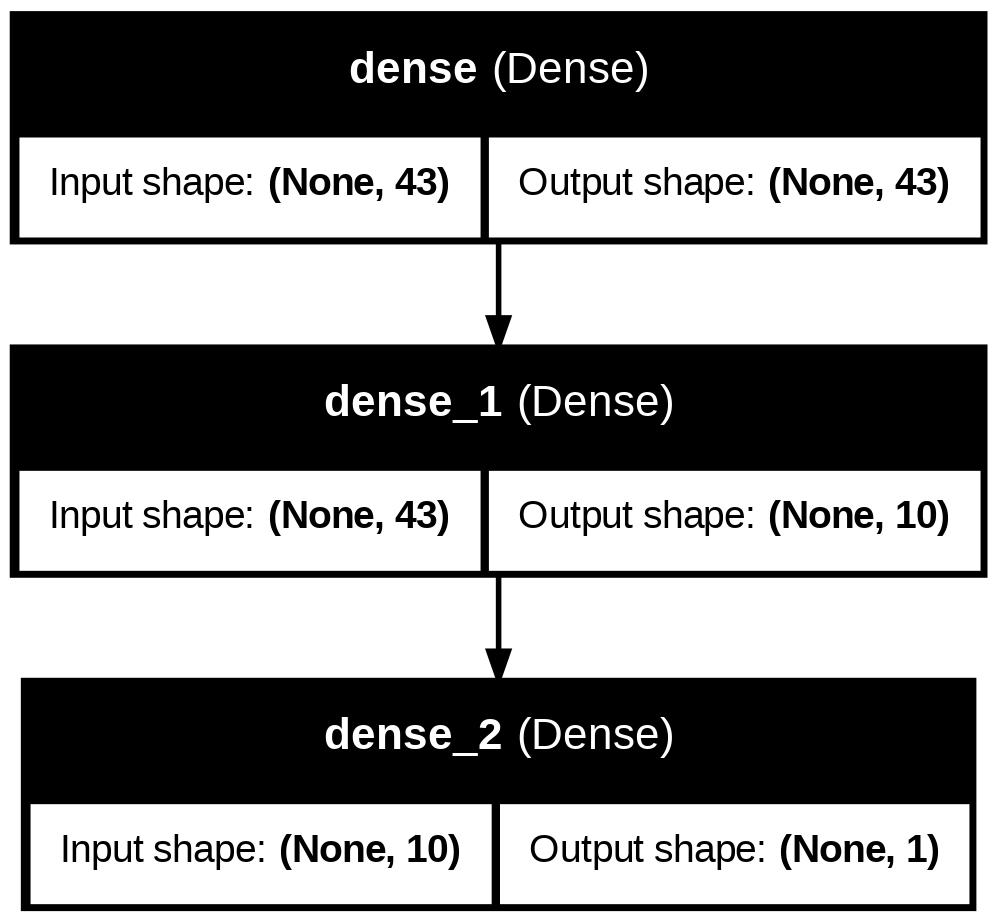

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
    pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 20.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


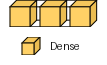

In [ ]:
    import visualkeras

    # For a layered view (good for CNNs)
    visualkeras.layered_view(model, legend=True)

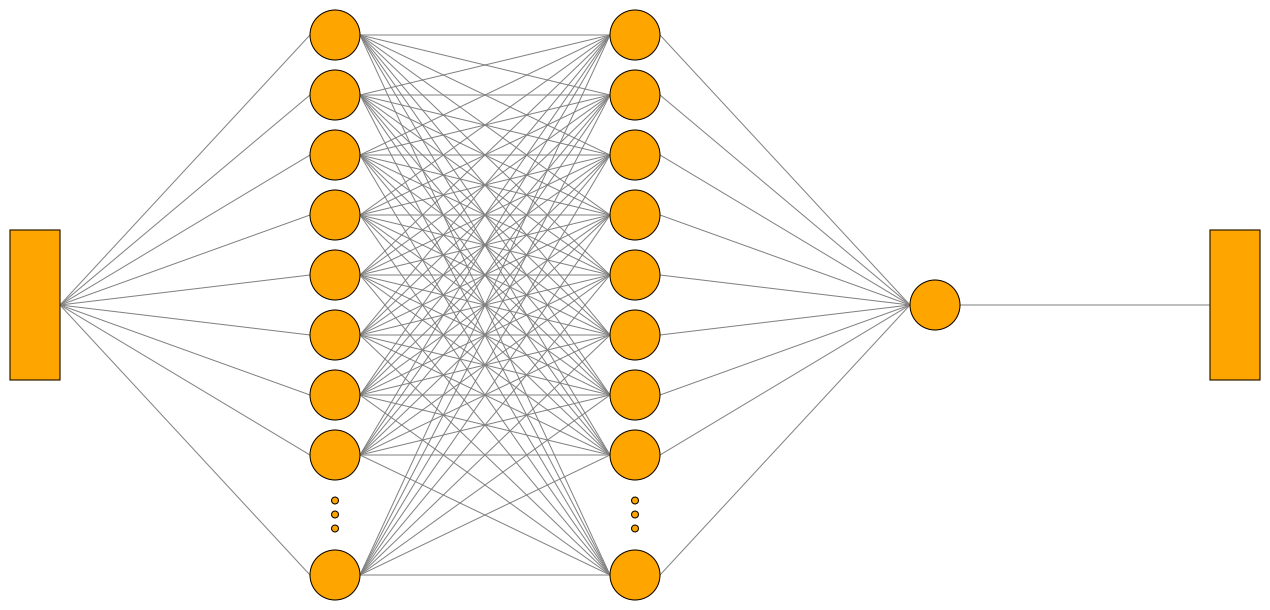

In [ ]:
visualkeras.graph_view(model)

In [ ]:
weights, biases = model.layers[0].get_weights()


In [ ]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name, weight.shape)

kernel (43, 43)
bias (43,)
kernel (43, 10)
bias (10,)
kernel (10, 1)
bias (1,)


In [ ]:
    for i, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()
        print(f"Layer {i+1} ({layer.name}):")
        print("Weights:\n", weights)
        print("Biases:\n", biases)

Layer 1 (dense):
Weights:
 [[-2.4038666e-01  1.8773288e-02 -1.4860001e-01 ... -1.7675276e-01
   5.5492043e-02 -1.8243995e-01]
 [ 2.1829655e+00 -1.2310222e+01  1.8068966e+00 ...  3.8088725e+00
   1.1397330e+00  7.4130583e+00]
 [-1.3494204e+00  1.8818596e+01 -1.9765209e+00 ... -3.9181137e+01
  -1.2587616e+00 -4.3461197e+01]
 ...
 [-6.8451714e+01  1.0094053e+01 -6.8210739e+01 ...  1.0282214e+00
  -1.2436908e+00 -4.1907139e+00]
 [ 7.3635626e+00  6.2012858e+00  7.4273596e+00 ... -6.8775253e+01
  -6.6338905e+01 -6.8817482e+01]
 [-6.5057945e+01  4.2538166e+00  4.1472535e+00 ... -6.8891304e+01
  -6.7902000e+01 -6.8662666e+01]]
Biases:
 [68.23388  67.81498  68.33356  70.05233  67.400215 70.360565 67.729645
 68.74151  67.77351  68.38078  67.73384  70.14867  68.2987   68.12406
 69.201805 68.32648  68.01828  69.90193  67.57012  69.32118  68.22352
 70.34002  68.62137  68.452805 68.454735 67.92251  69.93634  70.04287
 69.1893   70.11247  68.92504  70.06505  68.31509  68.26742  67.61946
 67.94729  68

In [ ]:
weights

array([[-2.4038666e-01,  1.8773288e-02, -1.4860001e-01, ...,
        -1.7675276e-01,  5.5492043e-02, -1.8243995e-01],
       [ 2.1829655e+00, -1.2310222e+01,  1.8068966e+00, ...,
         3.8088725e+00,  1.1397330e+00,  7.4130583e+00],
       [-1.3494204e+00,  1.8818596e+01, -1.9765209e+00, ...,
        -3.9181137e+01, -1.2587616e+00, -4.3461197e+01],
       ...,
       [-6.8451714e+01,  1.0094053e+01, -6.8210739e+01, ...,
         1.0282214e+00, -1.2436908e+00, -4.1907139e+00],
       [ 7.3635626e+00,  6.2012858e+00,  7.4273596e+00, ...,
        -6.8775253e+01, -6.6338905e+01, -6.8817482e+01],
       [-6.5057945e+01,  4.2538166e+00,  4.1472535e+00, ...,
        -6.8891304e+01, -6.7902000e+01, -6.8662666e+01]], dtype=float32)

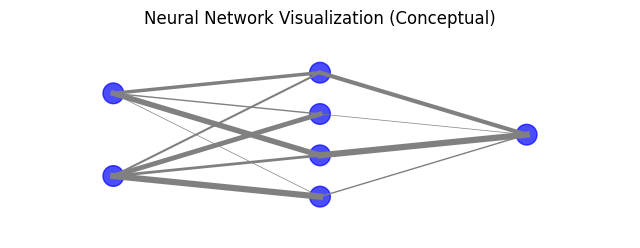

In [ ]:
    import matplotlib.pyplot as plt
    import numpy as np

    # Example: Visualize a simple network (requires manual layout)
    # This is a conceptual example and needs significant customization
    # to represent your specific network architecture and its weights/biases.

    # Assume you have weights and biases from get_weights()
    # For simplicity, let's use dummy values here
    weights_layer1 = np.array([[0.5, -0.2, 0.8, 0.1], [0.3, 0.7, -0.4, 0.9]])
    biases_layer1 = np.array([0.1, -0.3, 0.2, 0.5])
    weights_layer2 = np.array([[0.6], [-0.1], [0.9], [0.2]])
    biases_layer2 = np.array([0.05])

    fig, ax = plt.subplots(figsize=(8, 6))

    # Draw nodes (example for 2 input, 4 hidden, 1 output)
    input_nodes = [(0, 0.7), (0, 0.3)]
    hidden_nodes = [(1, 0.8), (1, 0.6), (1, 0.4), (1, 0.2)]
    output_nodes = [(2, 0.5)]

    for node in input_nodes + hidden_nodes + output_nodes:
        ax.add_patch(plt.Circle(node, 0.05, color='blue', alpha=0.7))

    # Draw connections (example)
    for i, input_node in enumerate(input_nodes):
        for j, hidden_node in enumerate(hidden_nodes):
            ax.plot([input_node[0], hidden_node[0]], [input_node[1], hidden_node[1]],
                    color='gray', linewidth=abs(weights_layer1[i, j]) * 5)

    for i, hidden_node in enumerate(hidden_nodes):
        for j, output_node in enumerate(output_nodes):
            ax.plot([hidden_node[0], output_node[0]], [hidden_node[1], output_node[1]],
                    color='gray', linewidth=abs(weights_layer2[i, j]) * 5)

    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    plt.title("Neural Network Visualization (Conceptual)")
    plt.show()

In [ ]:
predictions = model.predict(X_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)


In [ ]:
predicted_classes

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test[1]

KeyError: 1

In [ ]:
# 6. Make predictions (optional)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("\nSample Predictions (first 5):")
for i in range(5):
    print(f"Actual: {np.argmax(y_test[i])}, Predicted: {predicted_classes[i]}")

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Sample Predictions (first 5):
Actual: 0, Predicted: 0


KeyError: 1

In [ ]:

# 1. Load and preprocess the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode the target variable
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# 2. Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Input layer with 10 neurons
    keras.layers.Dense(10, activation='relu'),                                   # Hidden layer with 10 neurons
    keras.layers.Dense(3, activation='softmax')                                  # Output layer with 3 neurons (for 3 Iris classes)
])

# 3. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.1)

# 5. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# 6. Make predictions (optional)
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("\nSample Predictions (first 5):")
for i in range(5):
    print(f"Actual: {np.argmax(y_test[i])}, Predicted: {predicted_classes[i]}")